In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ugradio
import astropy.coordinates
import astropy.time
import time
import astropy.io.fits as fits

In [2]:
data_noise_on = []
data_noise_off = []

In [3]:
data_noise_off_example = fits.open('../Data/celestial_pole-noiseoff_' + str(0) + '.fits')

In [4]:
for i in range(0, 386):
    d_off_avg = []
    d_on_avg = []
    for j in range(1, 21):
        d_off = fits.open('../Data/celestial_pole-noiseoff_' + str(i) + '.fits')
        d_off = d_off[j].data['auto0_real']
        d_off_avg.append(d_off)
    d_off_avg = np.mean(d_off_avg, axis=0)
    data_noise_off.append(d_off_avg)
    
    for k in range(1, 3):
        d_on = fits.open('../Data/celestial_pole-noiseon_' + str(i) + '.fits')[k].data['auto0_real']
        d_on_avg.append(d_on)
    d_on_avg = np.mean(d_on_avg, axis=0)
    data_noise_on.append(d_on_avg)

In [5]:
hdr = dict(data_noise_off_example[0].header)
if_freq = 144 + np.arange(0, hdr['NCHAN']) * hdr['RES'] / 1e6
rf_freq = if_freq + 2*635

# this is wrong and stupid
data_noise_on_average = np.mean(data_noise_on, axis=0)
data_noise_off_average = np.mean(data_noise_off, axis=0)

<IPython.core.display.Javascript object>


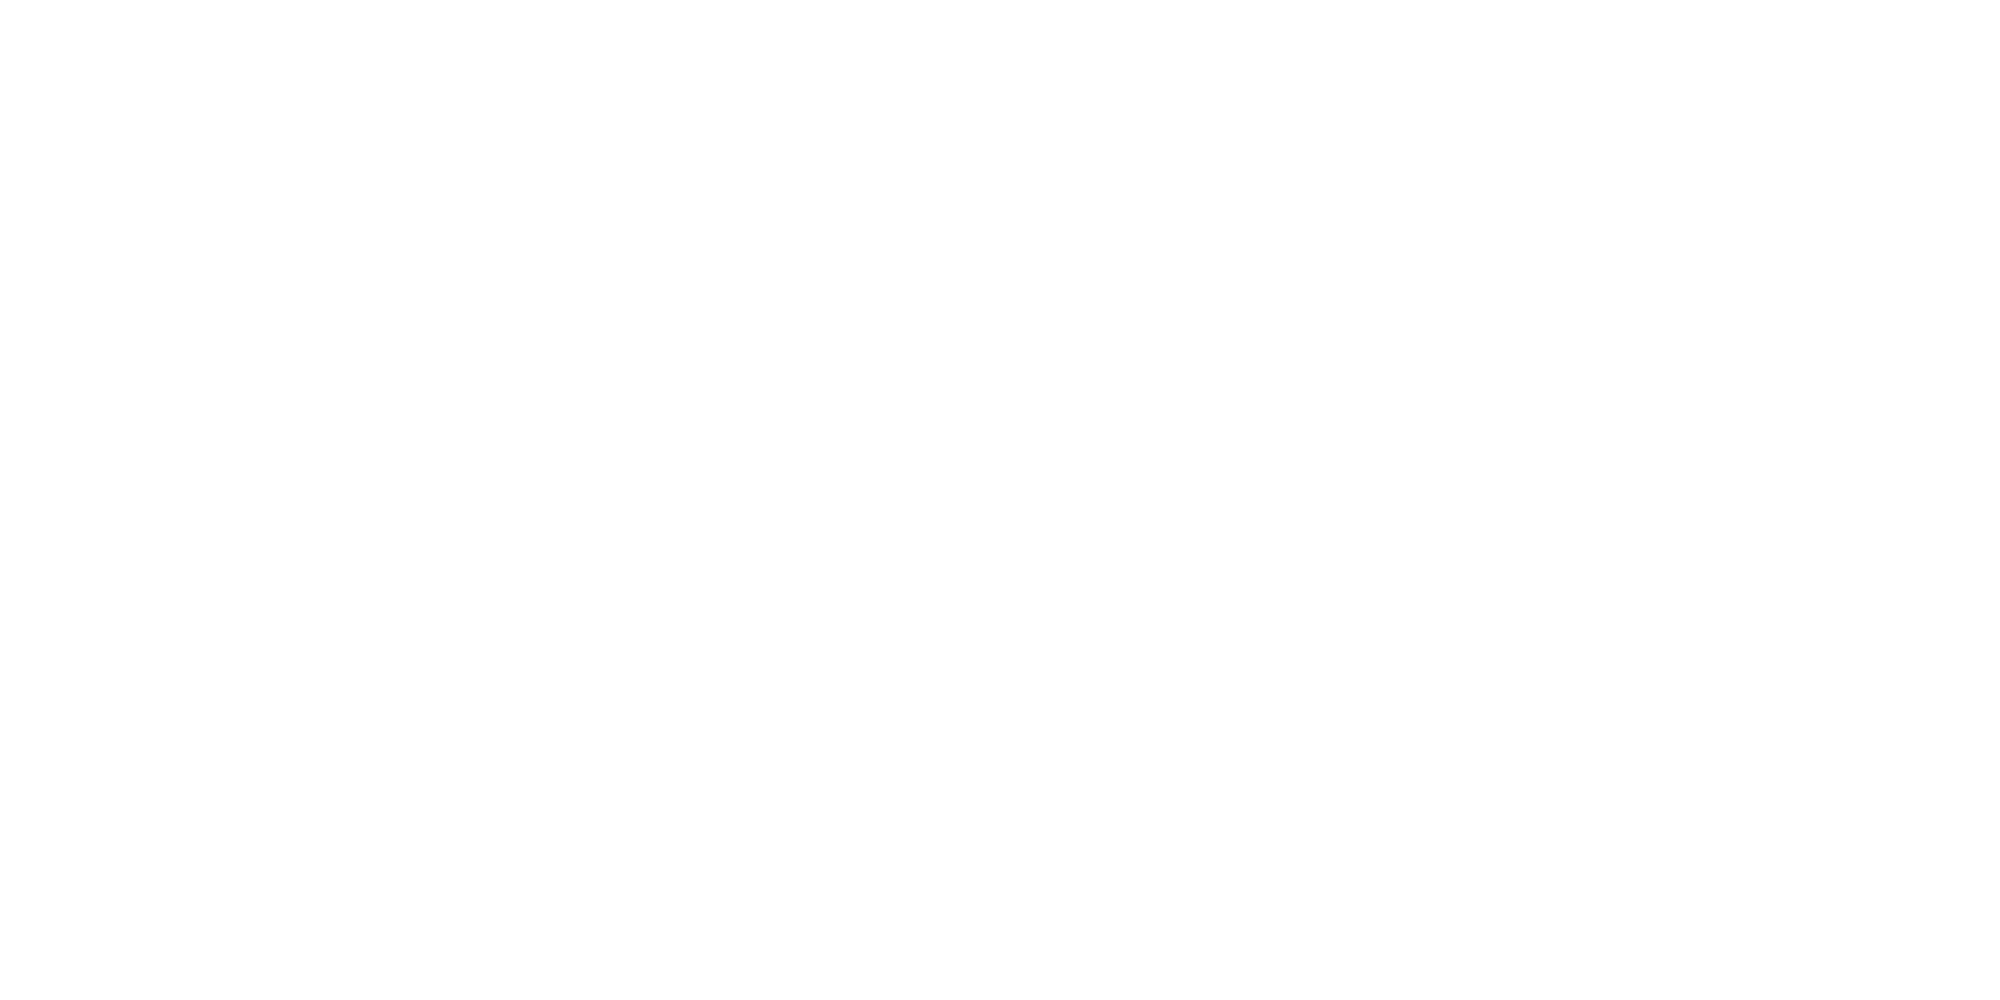

In [6]:
%matplotlib notebook
plt.figure(figsize=(10,5))

for i in range(0,386):
    
    #plt.plot(rf_freq, data_noise_on[i], label='ON')
    plt.plot(rf_freq, data_noise_off[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='r', label='HI Line')
plt.title('Noise Off Power Spectra of North Celestial Pole?', fontsize=15)
plt.legend()

#redshifted 

<IPython.core.display.Javascript object>


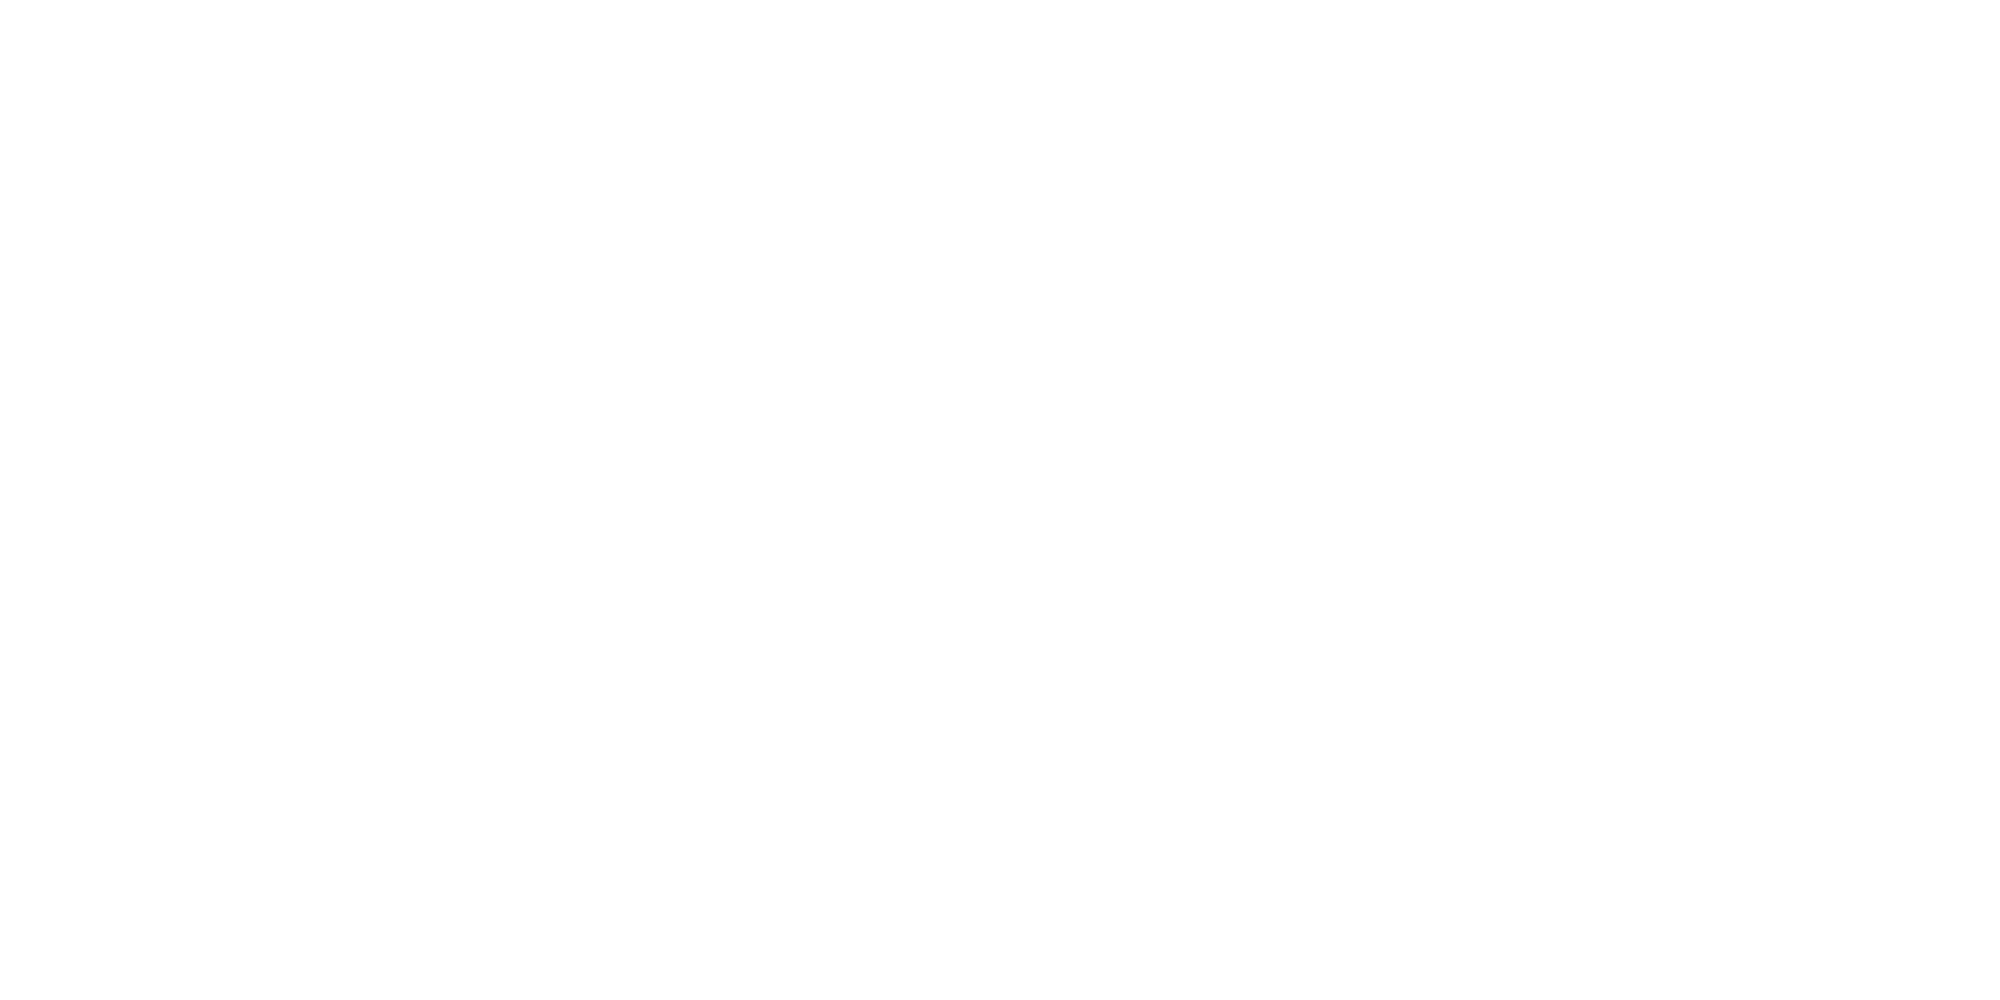

In [7]:
%matplotlib notebook
plt.figure(figsize=(10,5))

for i in range(0,386):
    
    plt.plot(rf_freq, data_noise_on[i])
    #plt.plot(rf_freq, data_noise_off[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='r', label='HI Line')
plt.title('Noise On Power Spectra of North Celestial Pole?', fontsize=15)
plt.legend()

#redshifted 

# Calibration 

In [8]:
import tqdm 

In [9]:
data_noise_on[i].shape[0]

8192

<IPython.core.display.Javascript object>


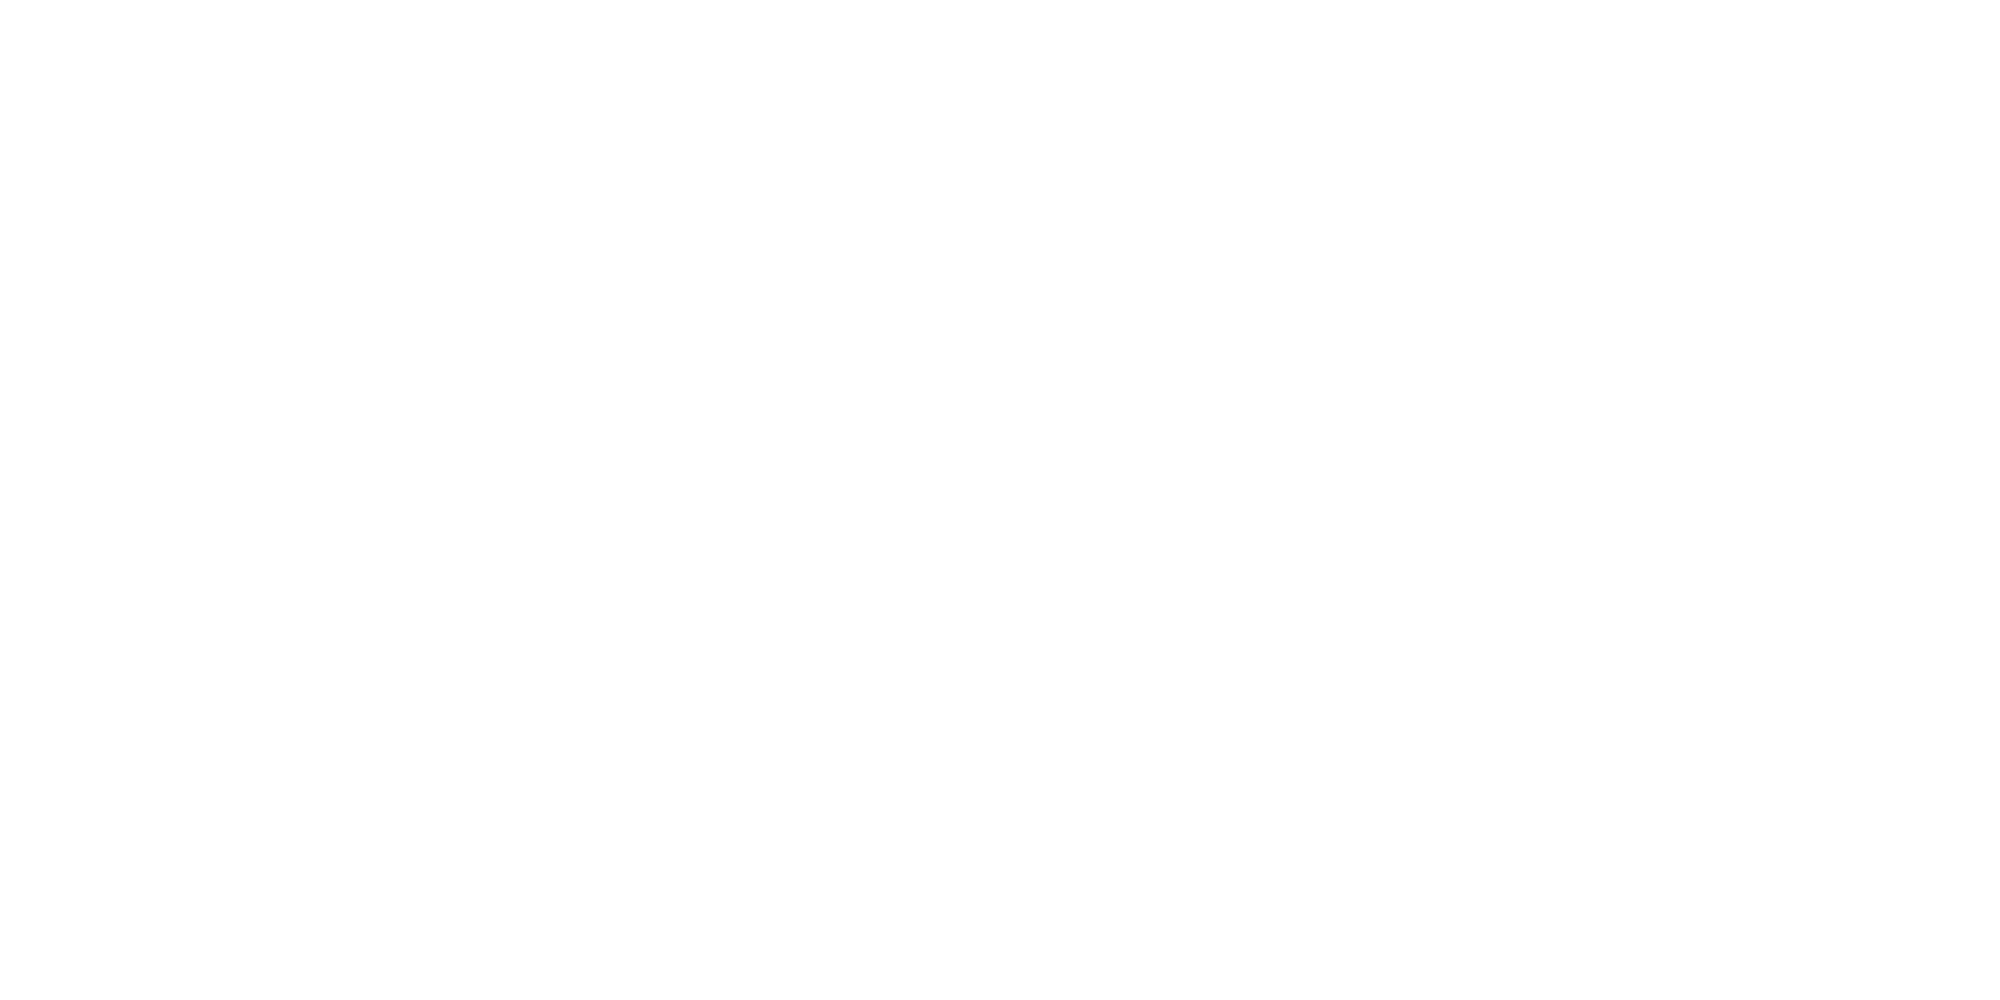

100%|██████████| 5/5 [00:00<00:00,  7.13it/s]


In [10]:
# are these values correct?
t_noise = 90
t_sys = 2.5

%matplotlib notebook
plt.figure(figsize=(10,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='dodgerblue', label='HI Line')
plt.title('Calibrated Noise Off', fontsize=15)

for i in tqdm.tqdm(range(0, 386, 80)):
    
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    p = np.polyfit(np.arange(np.array(s_line).shape[0]), s_line, 7)
    
    fit = np.polyval(p, np.arange(np.array(data_noise_off[i]).shape[0]))
    
    plt.plot(rf_freq, g*(s_line), label='ON') #off

    plt.plot(rf_freq, g*fit, "r")

In [11]:
calibrated_noise_off_spectra = []

<IPython.core.display.Javascript object>


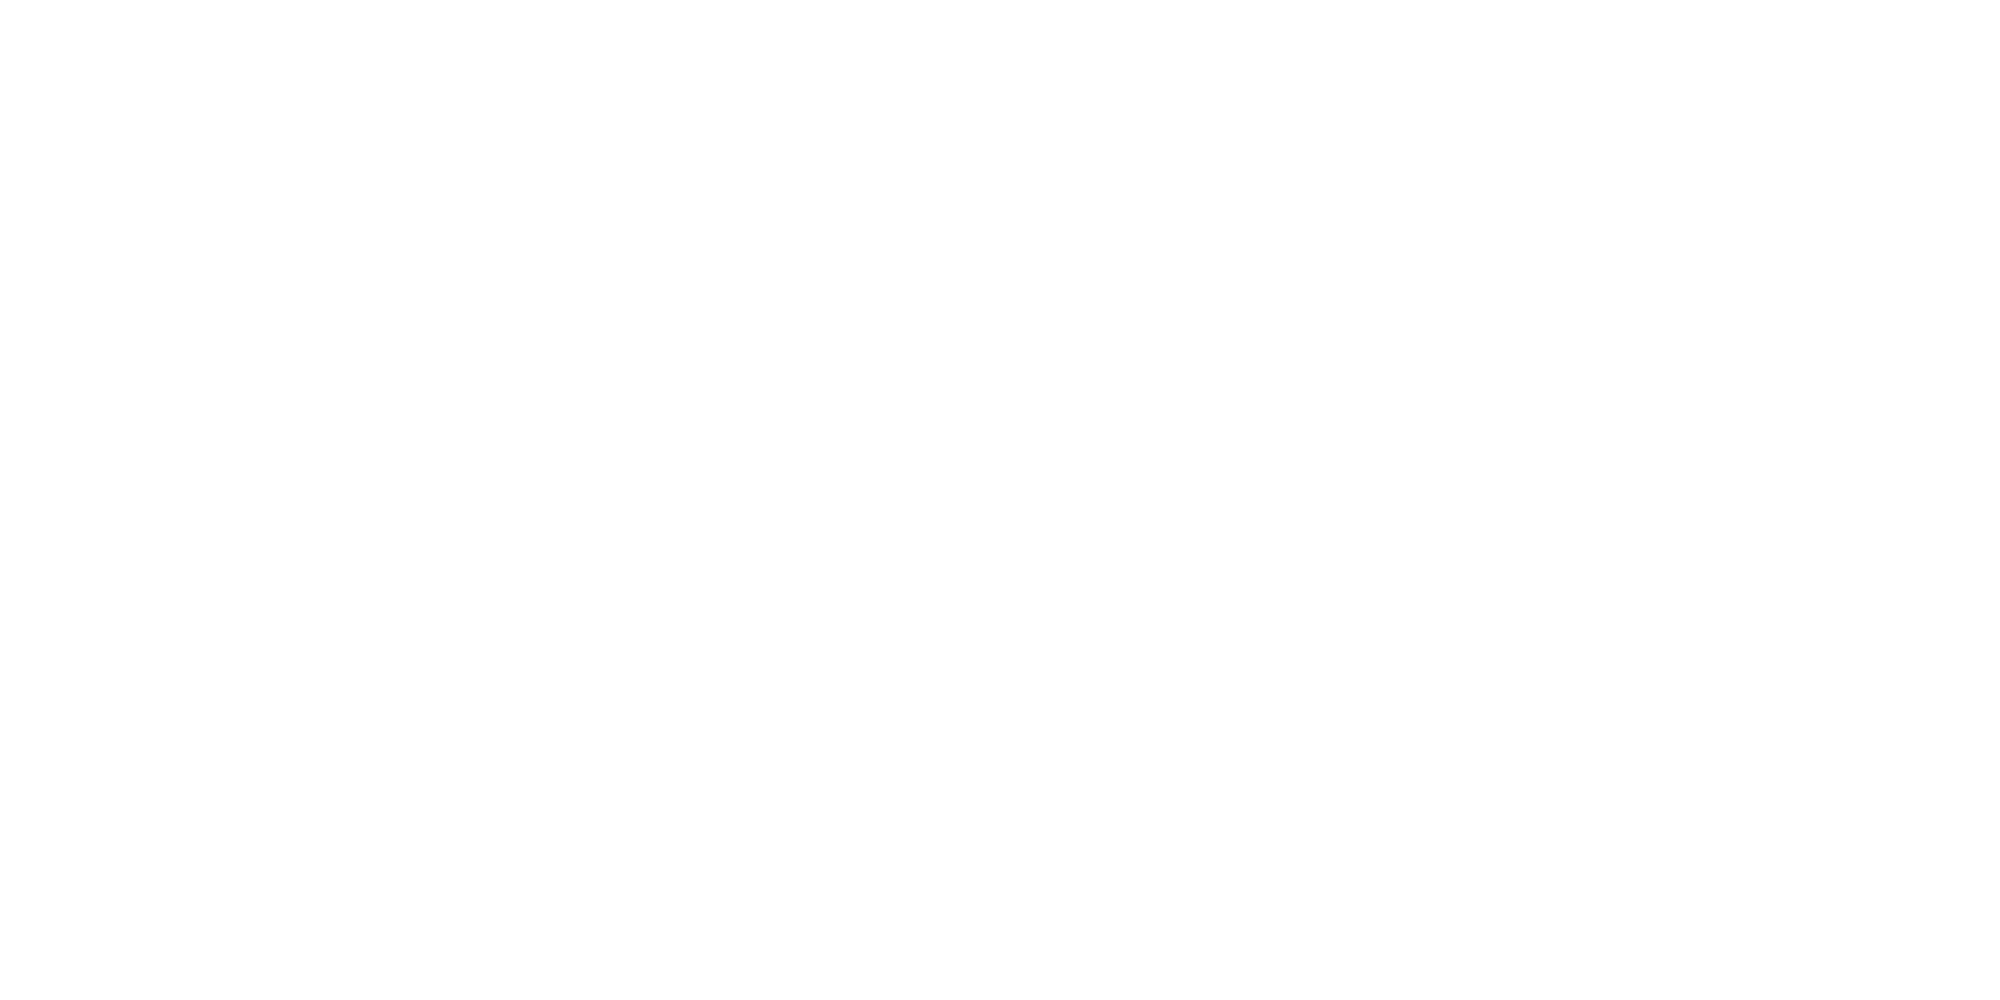

100%|██████████| 386/386 [00:12<00:00, 30.32it/s]


In [12]:
%matplotlib notebook
plt.figure(figsize=(10,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.axvline(1420.405, color='dodgerblue', label='HI Line')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)

for i in tqdm.tqdm(range(0, 386)):
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    p = np.polyfit(np.arange(np.array(s_line).shape[0]), s_line, 7)
    
    fit = np.polyval(p, np.arange(np.array(data_noise_off[i]).shape[0]))
    
    plt.plot(rf_freq, g*(s_line - fit), label='ON') #off
    
    calibrated_noise_off_spectra.append(g*(s_line - fit))

<IPython.core.display.Javascript object>


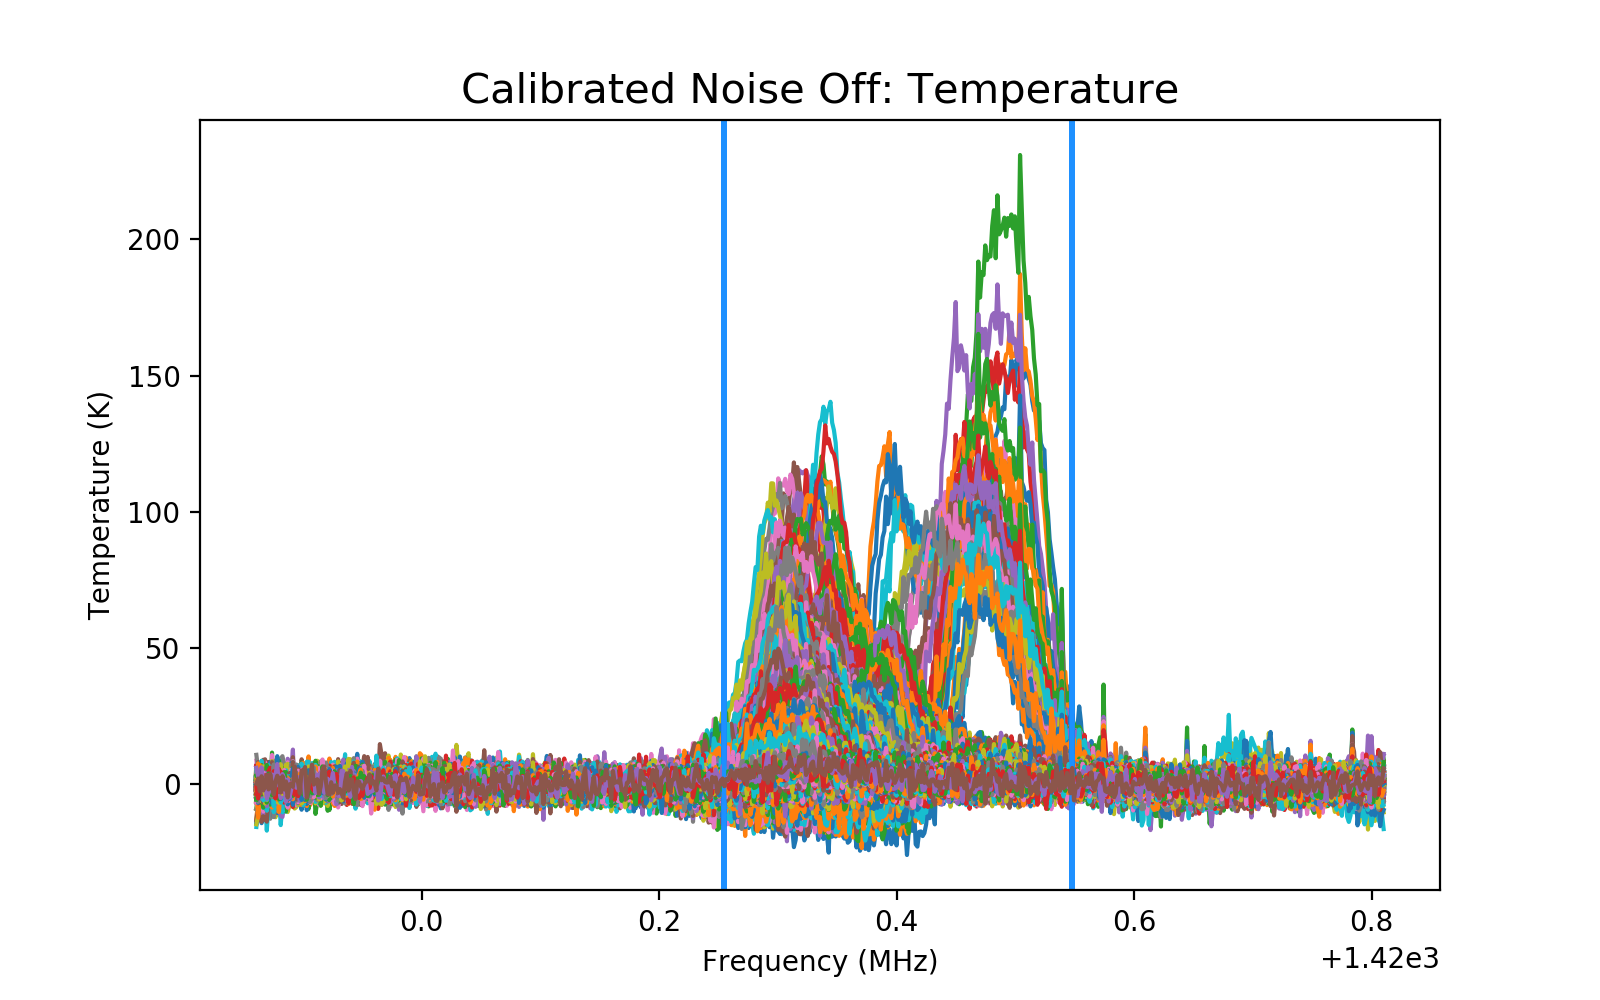

  0%|          | 1/386 [00:00<00:39,  9.75it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
  1%|          | 4/386 [00:00<00:34, 11.21it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/a

/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
 16%|█▌        | 62/386 [00:01<00:10, 31.80it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
 17%|█▋        | 66/386 [00:01<00:09, 32.44it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline

 33%|███▎      | 128/386 [00:04<00:15, 16.90it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
 34%|███▍      | 133/386 [00:04<00:13, 18.77it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeli

 49%|████▊     | 188/386 [00:08<00:11, 17.71it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
 49%|████▉     | 191/386 [00:08<00:10, 19.15it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
 50%|█████     | 194/386 [00:08<00:11, 16.71it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning

 64%|██████▍   | 248/386 [00:09<00:03, 42.97it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
 66%|██████▌   | 254/386 [00:09<00:03, 41.93it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeli

/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
 81%|████████  | 313/386 [00:11<00:02, 30.56it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykerne

/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
 97%|█████████▋| 374/386 [00:13<00:00, 33.12it/s]/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
 98%|█████████▊| 379/386 [00:13<00:00, 29.03it/s]/Users/madeli

In [43]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)
calibrated_noise_off_spectra = []
for i in tqdm.tqdm(range(0, 386)):
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    #line = np.concatenate(s_line[4000:4270],s_line[4470:5000])
    
    
    index = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4650]))[0]
    filt_freq = rf_freq[index]
    filt_power = s_line[index]
    ind_left = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4270]))[0] 
    ind_right = np.where((rf_freq > rf_freq[4470]) & (rf_freq < rf_freq[4650]))[0]
    inds = np.hstack([ind_left, ind_right])
    
    p = np.polyfit(rf_freq[inds], s_line[inds], 7)
    
    fit = np.polyval(p, rf_freq[index])
    
    plt.axvline(rf_freq[4270], color='dodgerblue')
    plt.axvline(rf_freq[4470], color='dodgerblue')
    
    plt.plot(rf_freq[index], g*(s_line[index] - fit), label='ON') #off
    calibrated_noise_off_spectra.append(g*(s_line[index] - fit))

In [14]:
#there is still ripple gain

#get rid by fitting region where the spike is not

#spike will be at different - look at a few spectra and see where spike moves to, how much it changes
#how fast do we expect the area around the north celecstial pole to 
#use that to find out how redshfited/ doppler shifted the object is 

#exclude frequencies -- use cursor to find right and left bounds on frequency on 5 or 10 random files -- break them up
#polyfit exluding peak but include region set around peak
#to make sure our peak is closer to zero

# Next Steps

In [64]:
galactic_1d_grid = []
galactic_latitude_array = np.arange(15, 41, 2)
galactic_longitude_array = np.arange(105, 160, 2)

for lat in galactic_latitude_array:
    for long in galactic_longitude_array:
        galactic_1d_grid.append((lat, long))
        
# get l,b for each spectra
# select 21cm line, and stick power into each grid 
# missing velocity - 
# low freq, mid freq, and high freq grids 

In [65]:
# 2d_array same size as galactic grid
# pick channel that span, sum it all up, get one number

# calibrated_noise_off_spectra
# axis 1 : long, axis 2: lat, axis 3: vel 

In [66]:
# sum up hi line power for each pointing
# finds out how much hydrogen per pointing
# select blue shifted hydrogen
# select red shifted hydrogen 

f_0 = 1420.4 #MHz
c = 3e8 #m/s
power_grid = []
intensity_grid = []
column_density_grid = []
for spectra in calibrated_noise_off_spectra:
    
    power = np.sum(spectra)
    #power = np.mean(spectra[4270 : 4470]) # fix this later # do different slices 
    power_grid.append(power)
    
    #spectra_index = list(spectra).index(max(spectra[4270 : 4470]))
    #freq = rf_freq[spectra_index]
    #brightness_temp = spectra[spectra_index]
    
    #intensity = 2*freq**2*(1.381e-23)*brightness_temp/(c**2)
    #intensity_grid.append(intensity)
    
    #v = freq*c/(2*f_0) * 10e2 # convert to cm/s
    #column_density = brightness_temp * v * 1.8e18
    #column_density_grid.append(column_density)

In [67]:
d_off = fits.open('../Data/celestial_pole-noiseoff_0.fits')
d_header = dict(d_off[0].header)

In [68]:
power_dict = {}
for i in range(0, len(power_grid)):
    d = fits.open('../Data/celestial_pole-noiseoff_' + str(i) + '.fits')
    d_header = dict(d[0].header)
    coord_tuple = (int(d_header['L']), int(d_header['B']))
    power_dict[coord_tuple] = power_grid[i]

In [69]:
two_d_array_power = [[0 for x in range(15, 42, 2)] for y in range(105, 161, 2)] 
#two_d_array_intensity = [[0 for x in range(15, 42, 2)] for y in range(105, 161, 2)] 
#two_d_array_density = [[0 for x in range(15, 42, 2)] for y in range(105, 161, 2)] 

In [70]:
i = 0
for elem in power_dict:
    #print(elem[0])
    two_d_array_power[( elem[1] - 105 ) // 2][( elem[0] - 15 ) // 2] = power_grid[i]
    #two_d_array_intensity[( elem[1] - 105 ) // 2][( elem[0] - 15 ) // 2] = intensity_grid[i]
    #two_d_array_density[( elem[1] - 105 ) // 2][( elem[0] - 15 ) // 2] = column_density_grid[i]
    i += 1

# grid graph for power

<IPython.core.display.Javascript object>


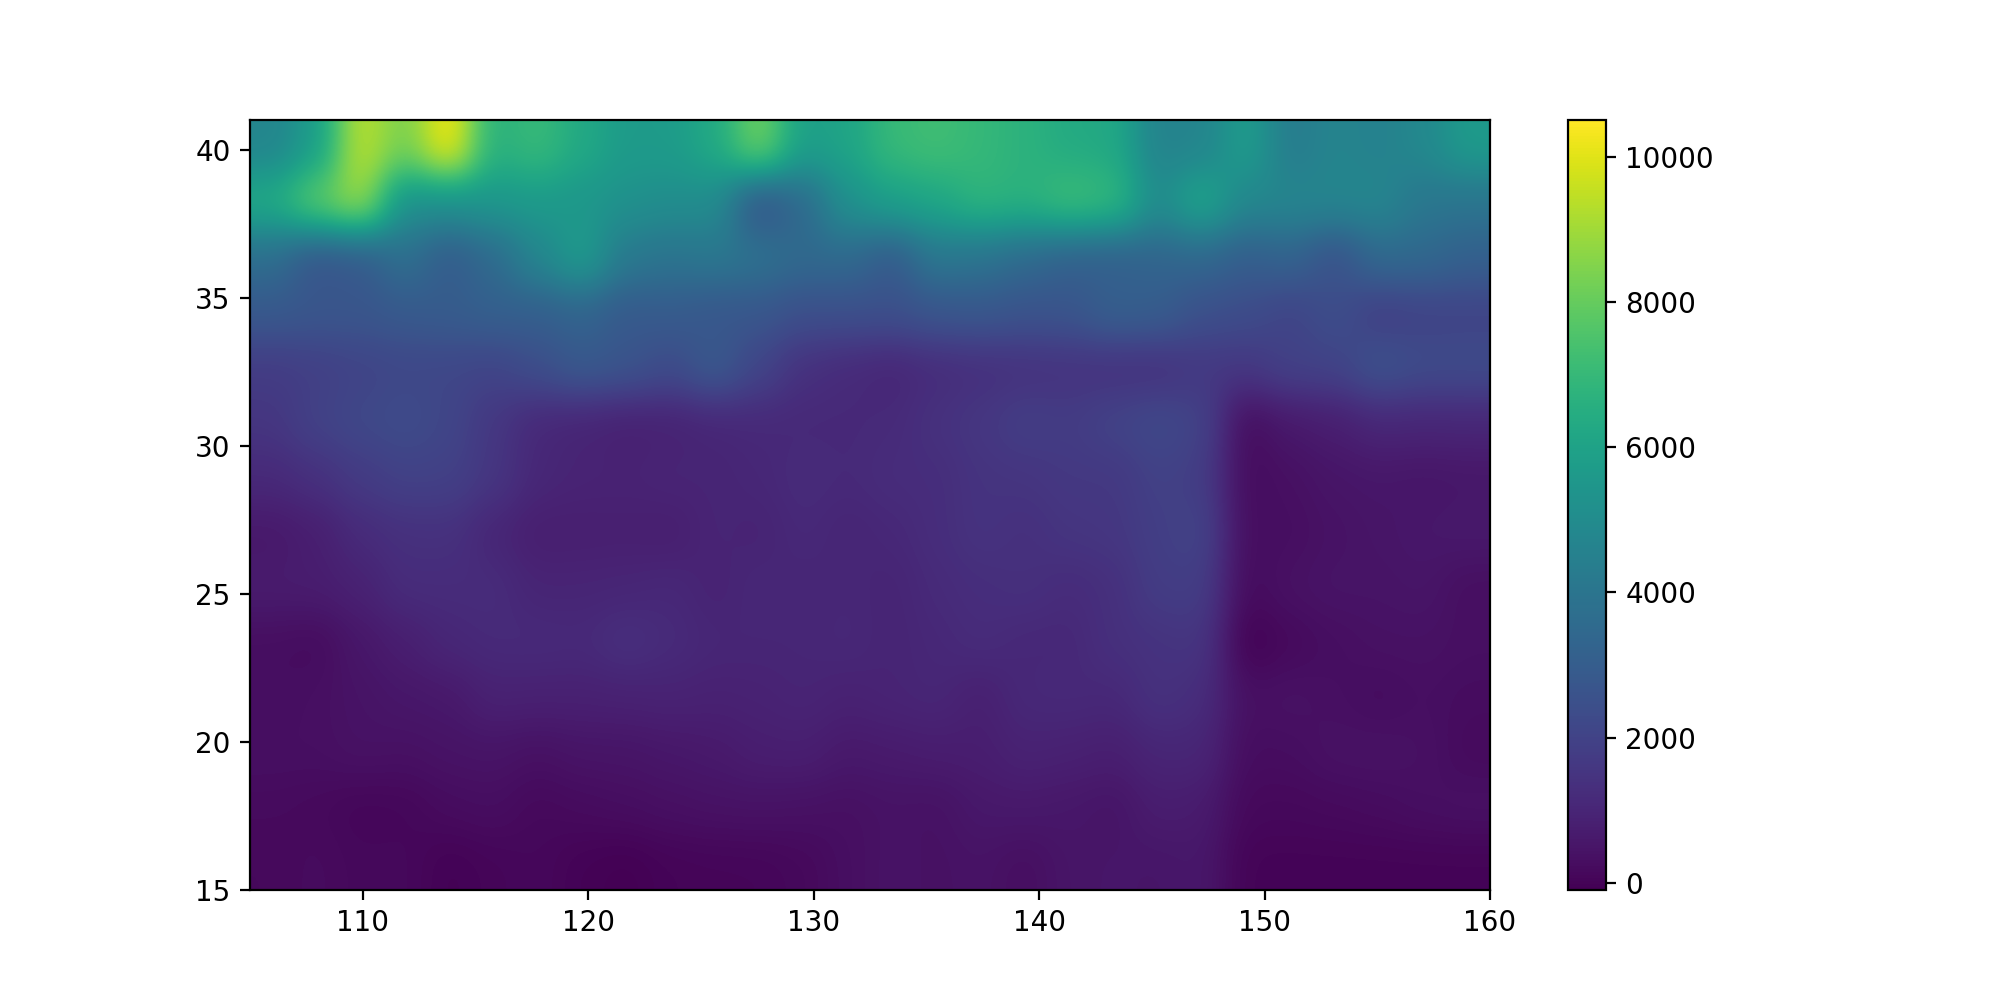

In [75]:
%matplotlib notebook
plt.figure(figsize=(10,5))
plt.imshow(np.array(two_d_array_power).T, aspect='auto', interpolation='gaussian',extent=[105,160,15,41])
# why is it so discontinuous 
# check spectra based on coordinates!!!!!!!!!!


#transpose this so its opposite
plt.colorbar()

# grid graph for specific intensity

<IPython.core.display.Javascript object>


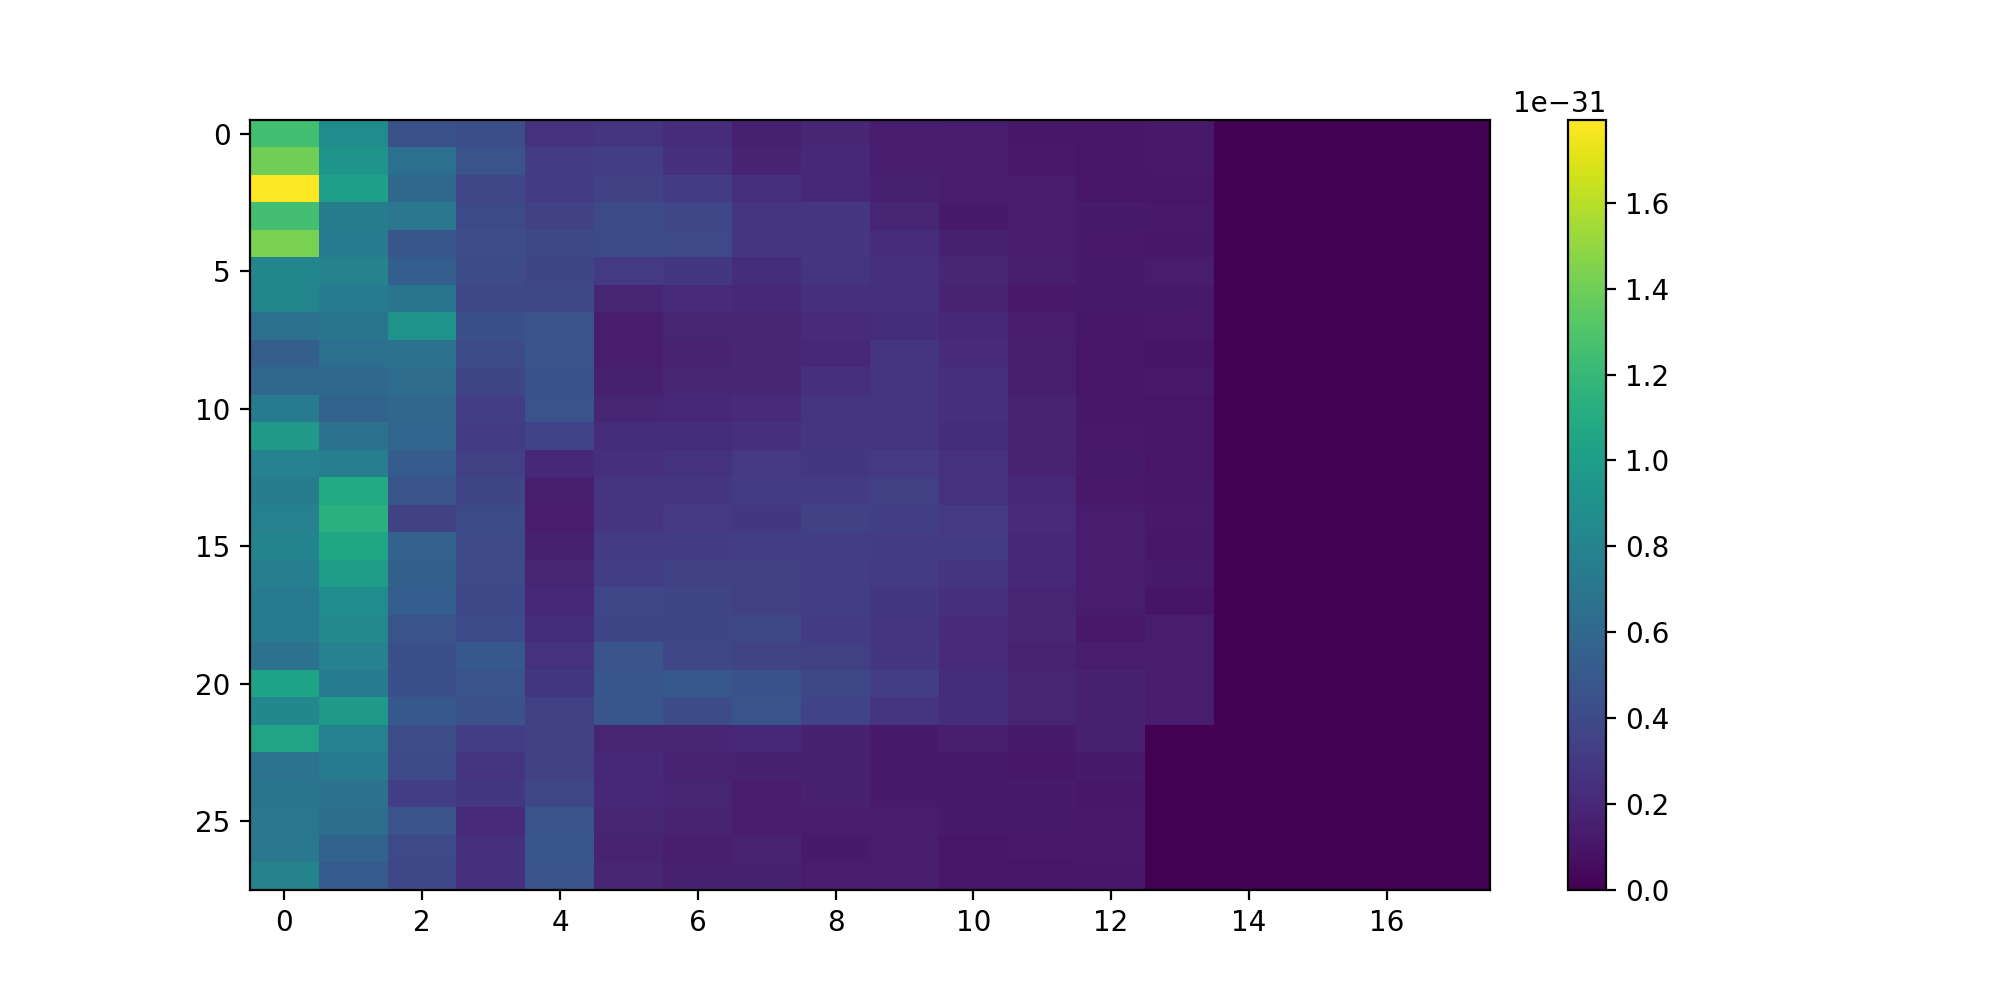

In [26]:
%matplotlib notebook
plt.figure(figsize=(10,5))
plt.imshow(two_d_array_intensity, aspect='auto')
# why is it so discontinuous 
# check spectra based on coordinates!!!!!!!!!!
plt.colorbar()

# column density of Hydrogen

<IPython.core.display.Javascript object>


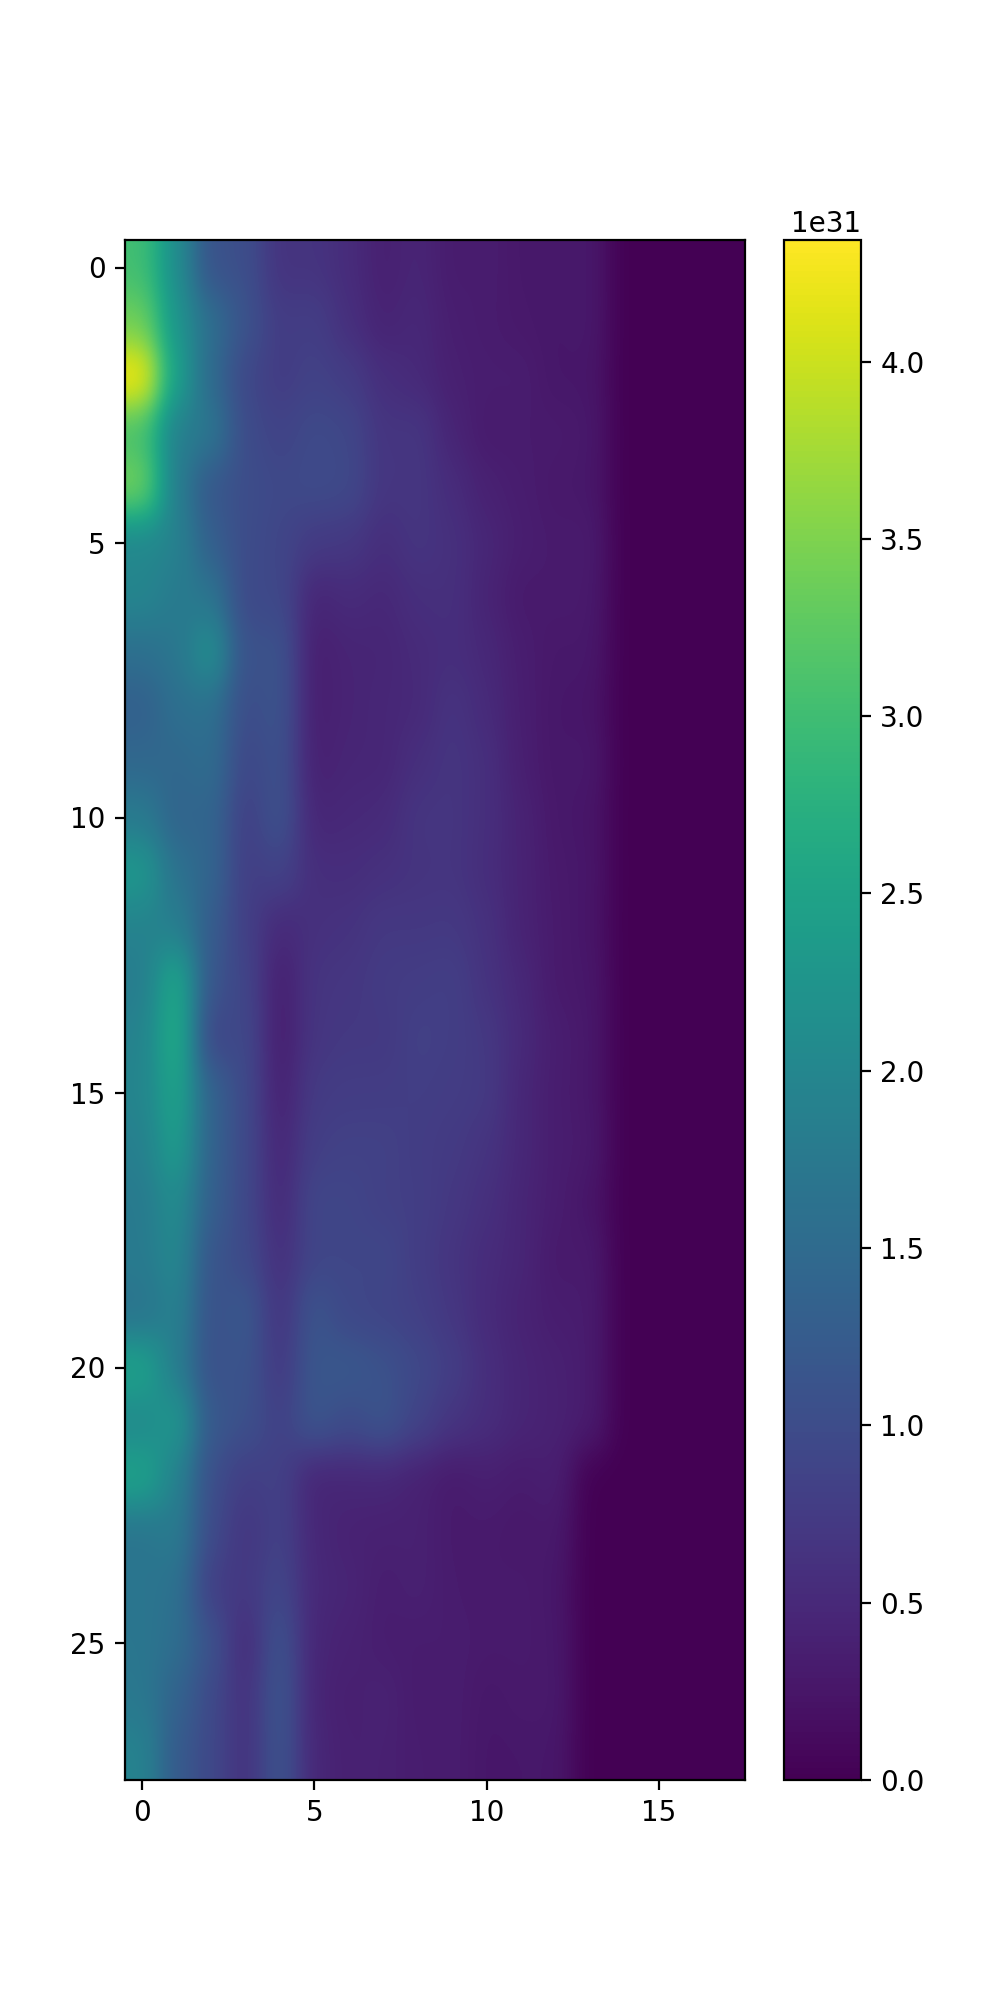

In [32]:
%matplotlib notebook
plt.figure(figsize=(5,10))
plt.imshow(two_d_array_density, aspect='auto', interpolation='gaussian')

# why is it so discontinuous 
# check spectra based on coordinates!!!!!!!!!!
plt.colorbar()

In [28]:
#make map
#change to RA,dec from l,b 

In [30]:
from mpl_toolkits.basemap import Basemap

In [31]:
bmap = Basemap(projection='cyl')
lons, lats = bmap.makegrid(500,500) 


/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
